# Innenlandsk godstransport 2010-2022

In [1]:
from pyjstat import pyjstat
import requests
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## API spørring

In [5]:
POST_URL = 'https://data.ssb.no/api/v0/no/table/11403'

payload={
  "query": [
    {
      "code": "Godstransport",
      "selection": {
        "filter": "all",
        "values": [
          "*"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "all",
        "values": [
          "*"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "all",
        "values": [
          "*"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}


## Få resultat fra APIen og lagre som pandas dataframe

In [6]:
# Post spørring og få Pandas dataframe i retur
# benytter biblioteket pyjstat for JSON-stat

resultat = requests.post(POST_URL, json = payload)
# Resultat gir bare http statuskode - 200 hvis OK. Body ligger i resultat.text
print(resultat)


dataset = pyjstat.Dataset.read(resultat.text)
df = dataset.write('dataframe')
df.to_pickle("gods.pkl")

<Response [200]>


## Lese inn pandas dataframe

In [2]:
df = pd.read_pickle("gods.pkl")

In [3]:
df.head()

,godstransport,statistikkvariabel,år,value
0,Godstransport i alt,Godsmengde (mill. tonn),2010,421.0
1,Godstransport i alt,Godsmengde (mill. tonn),2011,402.0
2,Godstransport i alt,Godsmengde (mill. tonn),2012,407.0
3,Godstransport i alt,Godsmengde (mill. tonn),2013,417.0
4,Godstransport i alt,Godsmengde (mill. tonn),2014,439.0


In [4]:
print(df["år"].unique())
print(df["godstransport"].unique())
print(df["statistikkvariabel"].unique())

['2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019'
 '2020' '2021' '2022']
['Godstransport i alt' 'Fastlandstransport i alt' 'Jernbanetransport'
 'Lufttransport' 'Veitransport' 'Sjøtransport' 'Bilferjeruter'
 'Annen sjøtransport' 'Norsk Ordinært Skipsregister (NOR)'
 'Norsk Internasjonalt Skipsregister (NIS)' 'Utenlandske skipsregistre'
 'Transport norsk kontinentalsokkel  -  fastland i alt'
 'Oljetransport med skip' 'Oljetransport i rør' 'Gasstransport i rør']
['Godsmengde (mill. tonn)' 'Transportarbeid (mill. tonnkm)'
 'Godsmengde inklusiv kabotasjetransport (mill. tonn)'
 'Transportarbeid inklusiv kabotasjetransport (mill. tonnkm)']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   godstransport       780 non-null    object 
 1   statistikkvariabel  780 non-null    object 
 2   år                  780 non-null    object 
 3   value               728 non-null    float64
dtypes: float64(1), object(3)
memory usage: 24.5+ KB


## Lage tabell for transportarbeid inklusiv kabotasje

In [6]:
df["år_int"] = df["år"].map(lambda x: int(x[:4]))

In [7]:
df_arb_kab=df[df["statistikkvariabel"]=="Transportarbeid inklusiv kabotasjetransport (mill. tonnkm)"]
df_arb_kab=df_arb_kab.pivot(index="år_int", columns='godstransport', values='value')

In [8]:
df_arb_kab

godstransport,Annen sjøtransport,Bilferjeruter,Fastlandstransport i alt,Gasstransport i rør,Godstransport i alt,Jernbanetransport,Lufttransport,Norsk Internasjonalt Skipsregister (NIS),Norsk Ordinært Skipsregister (NOR),Oljetransport i rør,Oljetransport med skip,Sjøtransport,Transport norsk kontinentalsokkel - fastland i alt,Utenlandske skipsregistre,Veitransport
år_int,,,,,,,,,,,,,,,
2010,15841.0,159.0,34951.0,20967.0,64117.0,1601.0,16.0,1249.0,1729.0,3465.0,4734.0,16000.0,29166.0,12863.0,17334.0
2011,16111.0,163.0,35133.0,19931.0,64231.0,1676.0,16.0,1051.0,2242.0,3372.0,5796.0,16274.0,29099.0,12818.0,17167.0
2012,18570.0,171.0,38571.0,20955.0,67841.0,1728.0,16.0,1480.0,2586.0,3115.0,5200.0,18741.0,29270.0,14504.0,18086.0
2013,18258.0,172.0,39924.0,18186.0,64748.0,1770.0,13.0,1332.0,2341.0,2724.0,3914.0,18430.0,24824.0,14585.0,19712.0
2014,19487.0,178.0,41673.0,21659.0,70011.0,1696.0,16.0,1157.0,2627.0,2845.0,3834.0,19665.0,28338.0,15703.0,20297.0
2015,21834.0,177.0,43626.0,21982.0,72867.0,1869.0,16.0,1377.0,2717.0,3377.0,3882.0,22011.0,29241.0,17740.0,19730.0
2016,16895.0,174.0,38744.0,22025.0,69269.0,1984.0,15.0,875.0,2640.0,3813.0,4687.0,17069.0,30525.0,13380.0,19676.0
2017,18444.0,178.0,40806.0,22983.0,73753.0,2093.0,16.0,1057.0,2593.0,4768.0,5197.0,18622.0,32948.0,14794.0,20075.0
2018,16990.0,180.0,39194.0,21826.0,70701.0,2032.0,11.0,1535.0,2478.0,4518.0,5162.0,17170.0,31506.0,12977.0,19982.0


In [9]:
df_arb_kab.describe()

godstransport,Annen sjøtransport,Bilferjeruter,Fastlandstransport i alt,Gasstransport i rør,Godstransport i alt,Jernbanetransport,Lufttransport,Norsk Internasjonalt Skipsregister (NIS),Norsk Ordinært Skipsregister (NOR),Oljetransport i rør,Oljetransport med skip,Sjøtransport,Transport norsk kontinentalsokkel - fastland i alt,Utenlandske skipsregistre,Veitransport
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,17744.461538,176.769231,39722.846154,21422.538462,70513.230769,1935.000000,12.615385,1171.461538,2501.846154,5125.153846,4243.000000,17921.153846,30790.538462,14071.153846,19854.230769
std,1651.662325,12.457620,2692.409851,1277.987129,4449.974478,221.424178,4.311582,356.395991,293.442171,2776.471437,1078.983009,1655.196506,2948.719627,1427.792693,1707.304315
min,15841.000000,159.000000,34951.000000,18186.000000,64117.000000,1601.000000,4.000000,271.000000,1729.000000,2724.000000,1700.000000,16000.000000,24824.000000,12634.000000,17167.000000
25%,16895.000000,171.000000,38571.000000,20967.000000,67841.000000,1728.000000,10.000000,1051.000000,2409.000000,3372.000000,3834.000000,17069.000000,29166.000000,12977.000000,19676.000000
50%,17593.000000,177.000000,39924.000000,21659.000000,70701.000000,1984.000000,15.000000,1249.000000,2586.000000,3813.000000,4335.000000,17794.000000,30525.000000,13691.000000,19982.000000
75%,18444.000000,180.000000,40989.000000,22025.000000,72867.000000,2106.000000,16.000000,1377.000000,2640.000000,5185.000000,5162.000000,18622.000000,32948.000000,14585.000000,20297.000000
max,21834.000000,201.000000,43821.000000,22983.000000,77863.000000,2231.000000,16.000000,1622.000000,2945.000000,10285.000000,5796.000000,22011.000000,35691.000000,17740.000000,23588.000000


## Godstransport i alt

In [10]:
# Godstransport i alt = Fastlandstransport i alt + Transport norsk kontinentalsokkel - fastland i alt
#df_arb_kab['Godstransport i alt']-df_arb_kab['Fastlandstransport i alt']-df_arb_kab['Transport norsk kontinentalsokkel  -  fastland i alt']

In [11]:
#Fastlandstransport i alt = Sjoe + Vei + Jerbane + Luft
#df_arb_kab['Fastlandstransport i alt']-df_arb_kab['Sjøtransport']-df_arb_kab['Jernbanetransport']-df_arb_kab['Lufttransport']-df_arb_kab['Veitransport']

In [12]:
# Sjotransport = Bilferjeruter + annen sjotransport
#df_arb_kab['Sjøtransport'] - df_arb_kab['Bilferjeruter']-df_arb_kab['Annen sjøtransport']

In [13]:
# Kontinentalsokkel - fastland = gass i ror, olje i ror, olje med skip
#df_arb_kab['Transport norsk kontinentalsokkel  -  fastland i alt']-df_arb_kab['Gasstransport i rør']-df_arb_kab['Oljetransport i rør']-df_arb_kab['Oljetransport med skip']

In [14]:
# Sjotransport = NIS + NOR + Utenlandsk + litt igjen
df_arb_kab['Sjøtransport']-df_arb_kab['Norsk Internasjonalt Skipsregister (NIS)']-df_arb_kab['Norsk Ordinært Skipsregister (NOR)']-df_arb_kab['Utenlandske skipsregistre']

år_int
2010    159.0
2011    163.0
2012    171.0
2013    172.0
2014    178.0
2015    177.0
2016    174.0
2017    178.0
2018    180.0
2019    201.0
2020    162.0
2021    186.0
2022    196.0
dtype: float64

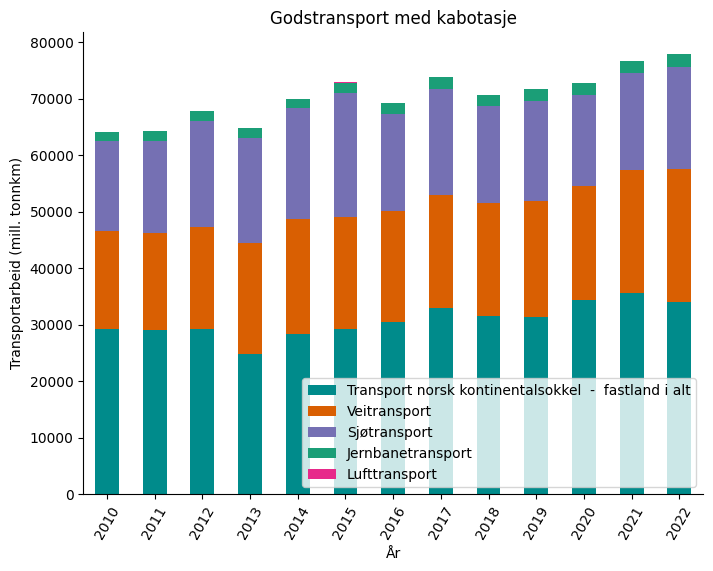

In [39]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colors=['#008b8b','#d95f02', '#7570b3', '#1b9e77', '#e7298a']
df_arb_kab[["Transport norsk kontinentalsokkel  -  fastland i alt","Veitransport", "Sjøtransport",  "Jernbanetransport", "Lufttransport"]].plot(ax=ax, kind='bar', stacked=True, rot=60, color=colors )

ax.set_xlabel("År")
ax.set_ylabel("Transportarbeid (mill. tonnkm)")
ax.set_title("Godstransport med kabotasje")
ax.spines[['right', 'top']].set_visible(False)
ax.legend(loc='lower right')

fig.savefig('img/Godstransport.jpg')

In [16]:
df_arb_kab['Sjøtransport_prosent']=df_arb_kab['Sjøtransport']/df_arb_kab['Fastlandstransport i alt']
df_arb_kab['Lufttransport_prosent']=df_arb_kab['Lufttransport']/df_arb_kab['Fastlandstransport i alt']
df_arb_kab['Veitransport_prosent']=df_arb_kab['Veitransport']/df_arb_kab['Fastlandstransport i alt']
df_arb_kab['Jernbanetransport_prosent']=df_arb_kab['Jernbanetransport']/df_arb_kab['Fastlandstransport i alt']

df_arb_kab['Bilferjeruter_prosent']=df_arb_kab['Bilferjeruter']/df_arb_kab['Sjøtransport']
df_arb_kab['Annen sjøtransport_prosent']=df_arb_kab['Annen sjøtransport']/df_arb_kab['Sjøtransport']

df_arb_kab['Gasstransport i rør_prosent']=df_arb_kab['Gasstransport i rør']/df_arb_kab['Transport norsk kontinentalsokkel  -  fastland i alt']
df_arb_kab['Oljetransport i rør_prosent']=df_arb_kab['Oljetransport i rør']/df_arb_kab['Transport norsk kontinentalsokkel  -  fastland i alt']
df_arb_kab['Oljetransport med skip_prosent']=df_arb_kab['Oljetransport med skip']/df_arb_kab['Transport norsk kontinentalsokkel  -  fastland i alt']

df_arb_kab["NIS_prosent"]=df_arb_kab['Norsk Internasjonalt Skipsregister (NIS)']/df_arb_kab['Sjøtransport']
df_arb_kab["NOR_prosent"]=df_arb_kab['Norsk Ordinært Skipsregister (NOR)']/df_arb_kab['Sjøtransport']
df_arb_kab["Utenlandske skipsregistre_prosent"] = df_arb_kab['Utenlandske skipsregistre']/df_arb_kab['Sjøtransport']
df_arb_kab['utenreg_prosent'] = (df_arb_kab['Sjøtransport']-df_arb_kab['Norsk Internasjonalt Skipsregister (NIS)']-df_arb_kab['Norsk Ordinært Skipsregister (NOR)']-df_arb_kab['Utenlandske skipsregistre'])/df_arb_kab['Sjøtransport']

In [17]:
df_arb_kab.describe()

godstransport,Annen sjøtransport,Bilferjeruter,Fastlandstransport i alt,Gasstransport i rør,Godstransport i alt,Jernbanetransport,Lufttransport,Norsk Internasjonalt Skipsregister (NIS),Norsk Ordinært Skipsregister (NOR),Oljetransport i rør,...,Jernbanetransport_prosent,Bilferjeruter_prosent,Annen sjøtransport_prosent,Gasstransport i rør_prosent,Oljetransport i rør_prosent,Oljetransport med skip_prosent,NIS_prosent,NOR_prosent,Utenlandske skipsregistre_prosent,utenreg_prosent
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,17744.461538,176.769231,39722.846154,21422.538462,70513.230769,1935.000000,12.615385,1171.461538,2501.846154,5125.153846,...,0.048732,0.009917,0.990087,0.699169,0.161089,0.139747,0.065302,0.139954,0.784831,0.009913
std,1651.662325,12.457620,2692.409851,1277.987129,4449.974478,221.424178,4.311582,356.395991,293.442171,2776.471437,...,0.004705,0.000899,0.000893,0.048418,0.071769,0.038939,0.019413,0.015776,0.017790,0.000893
min,15841.000000,159.000000,34951.000000,18186.000000,64117.000000,1601.000000,4.000000,271.000000,1729.000000,2724.000000,...,0.040698,0.008041,0.988704,0.590373,0.100395,0.049938,0.015854,0.108063,0.748791,0.008041
25%,16895.000000,171.000000,38571.000000,20967.000000,67841.000000,1728.000000,10.000000,1051.000000,2409.000000,3372.000000,...,0.044800,0.009333,0.989517,0.684938,0.115489,0.121459,0.056761,0.133588,0.773918,0.009333
50%,17593.000000,177.000000,39924.000000,21659.000000,70701.000000,1984.000000,15.000000,1249.000000,2586.000000,3813.000000,...,0.050912,0.010016,0.989984,0.715921,0.124914,0.153546,0.064582,0.139244,0.787637,0.010016
75%,18444.000000,180.000000,40989.000000,22025.000000,72867.000000,2106.000000,16.000000,1377.000000,2640.000000,5185.000000,...,0.051845,0.010483,0.990667,0.725418,0.165586,0.162312,0.078063,0.149544,0.798525,0.010483
max,21834.000000,201.000000,43821.000000,22983.000000,77863.000000,2231.000000,16.000000,1622.000000,2945.000000,10285.000000,...,0.056608,0.011296,0.991959,0.764309,0.288168,0.199182,0.090126,0.172293,0.805961,0.011296


In [18]:
df_arb_kab[['Lufttransport_prosent','Jernbanetransport_prosent', 'Sjøtransport_prosent', 'Veitransport_prosent']].describe()

godstransport,Lufttransport_prosent,Jernbanetransport_prosent,Sjøtransport_prosent,Veitransport_prosent
count,13.000000,13.000000,13.000000,13.000000
mean,0.000322,0.048732,0.451214,0.499736
std,0.000117,0.004705,0.027558,0.023876
min,0.000091,0.040698,0.410694,0.452253
25%,0.000260,0.044800,0.438077,0.488629
50%,0.000367,0.050912,0.456354,0.495951
75%,0.000392,0.051845,0.463211,0.509823
max,0.000458,0.056608,0.504539,0.538281


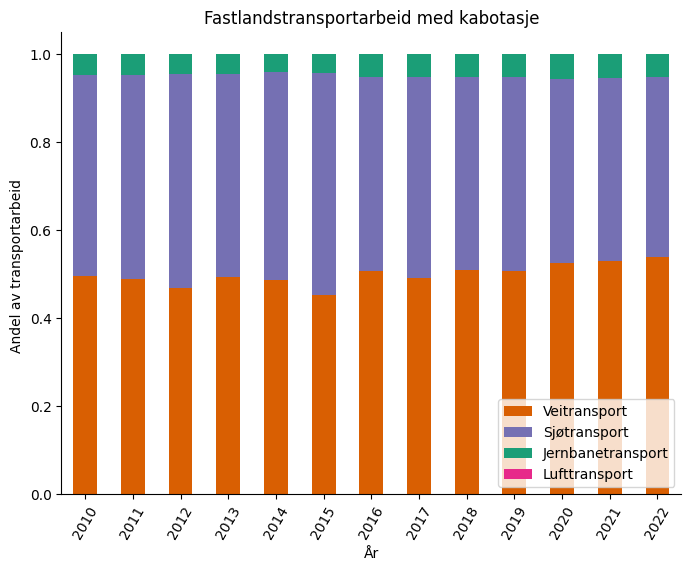

In [42]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colors=['#008b8b','#d95f02', '#7570b3', '#1b9e77', '#e7298a']
df_arb_kab[["Veitransport_prosent", "Sjøtransport_prosent",  "Jernbanetransport_prosent", "Lufttransport_prosent"]].plot(ax=ax, kind='bar', stacked=True, rot=60, color=colors[1:] )
handles,labels = ax.get_legend_handles_labels()
labels = ["Veitransport", "Sjøtransport", "Jernbanetransport","Lufttransport"]
ax.legend(handles,labels, loc='lower right')
ax.set_xlabel("År")
ax.set_ylabel("Andel av transportarbeid ")
ax.set_title("Fastlandstransportarbeid med kabotasje")
ax.spines[['right', 'top']].set_visible(False)

fig.savefig('img/fastland_arbeid.jpg')
# Lufttransport er 0.03% gjennomsnitt
# Jernbane 5%
# Sjo 45%
# 50%

### Transpportmengde med kabotasje

In [20]:
df_men_kab=df[df["statistikkvariabel"]=="Godsmengde inklusiv kabotasjetransport (mill. tonn)"]
df_men_kab=df_men_kab.pivot(index="år_int", columns='godstransport', values='value')

In [21]:
df_men_kab['Fastlandstransport i alt']

år_int
2010    344.0
2011    338.0
2012    340.0
2013    360.0
2014    384.0
2015    366.0
2016    359.0
2017    348.0
2018    340.0
2019    333.0
2020    327.0
2021    349.0
2022    348.0
Name: Fastlandstransport i alt, dtype: float64

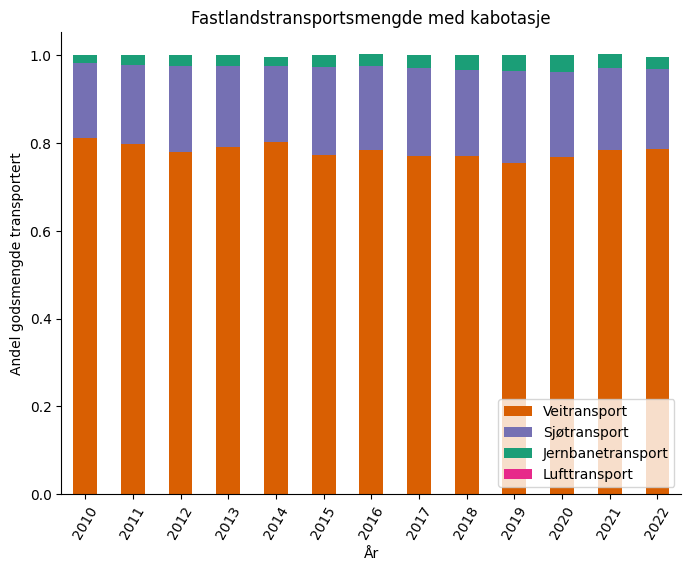

In [41]:
df_men_kab['Veitransport_prosent']=df_men_kab['Veitransport']/df_men_kab['Fastlandstransport i alt']
df_men_kab['Sjøtransport_prosent']=df_men_kab['Sjøtransport']/df_men_kab['Fastlandstransport i alt']
df_men_kab['Jernbanetransport_prosent']=df_men_kab['Jernbanetransport']/df_men_kab['Fastlandstransport i alt']
df_men_kab['Lufttransport_prosent']=df_men_kab['Lufttransport']/df_men_kab['Fastlandstransport i alt']

fig, ax = plt.subplots(1,1, figsize=(8,6))
colors=['#008b8b','#d95f02', '#7570b3', '#1b9e77', '#e7298a']
df_men_kab[["Veitransport_prosent", "Sjøtransport_prosent",  "Jernbanetransport_prosent", "Lufttransport_prosent"]].plot(ax=ax, kind='bar', stacked=True, rot=60, color=colors[1:] )
handles,labels = ax.get_legend_handles_labels()
labels = ["Veitransport", "Sjøtransport", "Jernbanetransport","Lufttransport"]
ax.legend(handles,labels, loc='lower right')
ax.set_xlabel("År")
ax.set_ylabel("Andel godsmengde transportert")
ax.set_title("Fastlandstransportsmengde med kabotasje")
ax.spines[['right', 'top']].set_visible(False)

fig.savefig('img/fastland_mengde.jpg')

In [23]:
df_arb_kab['Bilferjeruter_prosent'].describe()

count    13.000000
mean      0.009917
std       0.000899
min       0.008041
25%       0.009333
50%       0.010016
75%       0.010483
max       0.011296
Name: Bilferjeruter_prosent, dtype: float64

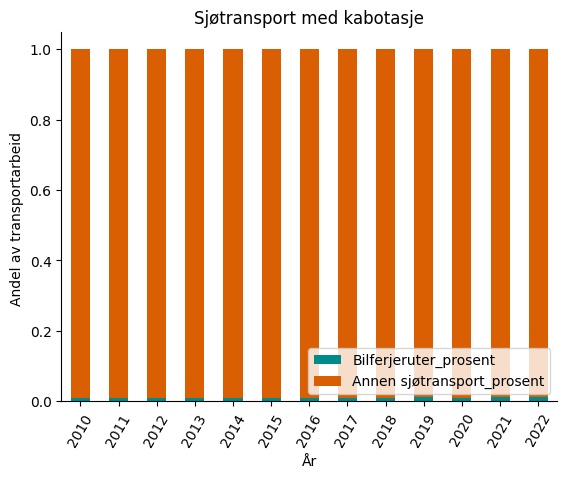

In [24]:
# Bilferjeruter er i gjennomsnittet 1%
fig, ax = plt.subplots(1,1)
colors=['#008b8b','#d95f02', '#7570b3', '#1b9e77', '#e7298a']
df_arb_kab[["Bilferjeruter_prosent", "Annen sjøtransport_prosent"]].plot(ax=ax, kind='bar', stacked=True, rot=60, color=colors )

ax.set_xlabel("År")
ax.set_ylabel("Andel av transportarbeid ")
ax.set_title("Sjøtransport med kabotasje")
ax.spines[['right', 'top']].set_visible(False)
ax.legend(loc='lower right')

In [25]:
df_arb_kab[['Oljetransport med skip_prosent','Oljetransport i rør_prosent', 'Gasstransport i rør_prosent']].describe()

godstransport,Oljetransport med skip_prosent,Oljetransport i rør_prosent,Gasstransport i rør_prosent
count,13.000000,13.000000,13.000000
mean,0.139747,0.161089,0.699169
std,0.038939,0.071769,0.048418
min,0.049938,0.100395,0.590373
25%,0.121459,0.115489,0.684938
50%,0.153546,0.124914,0.715921
75%,0.162312,0.165586,0.725418
max,0.199182,0.288168,0.764309


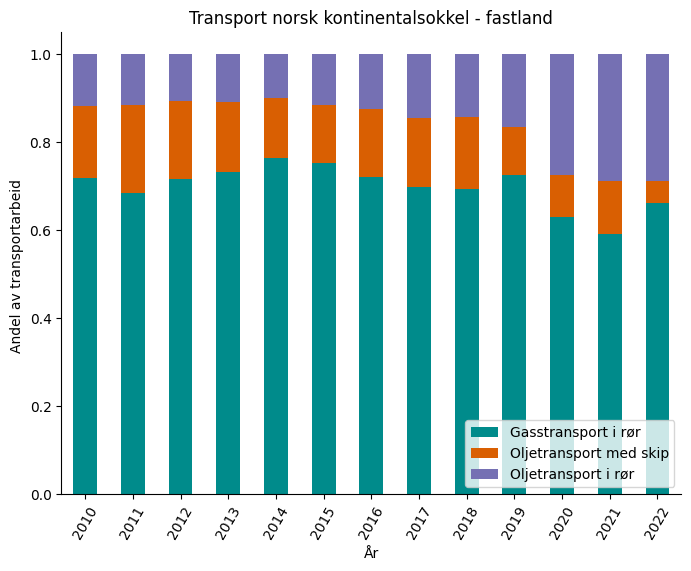

In [48]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colors=['#008b8b','#d95f02', '#7570b3', '#1b9e77', '#e7298a']
df_arb_kab[['Gasstransport i rør_prosent','Oljetransport med skip_prosent','Oljetransport i rør_prosent']].plot(ax=ax, kind='bar', stacked=True, rot=60, color=colors )
handles,labels = ax.get_legend_handles_labels()
labels = ['Gasstransport i rør','Oljetransport med skip','Oljetransport i rør']
ax.legend(handles,labels, loc='lower right')
ax.set_xlabel("År")
ax.set_ylabel("Andel av transportarbeid ")
ax.set_title("Transport norsk kontinentalsokkel - fastland")
ax.spines[['right', 'top']].set_visible(False)

fig.savefig('img/olje.jpg')


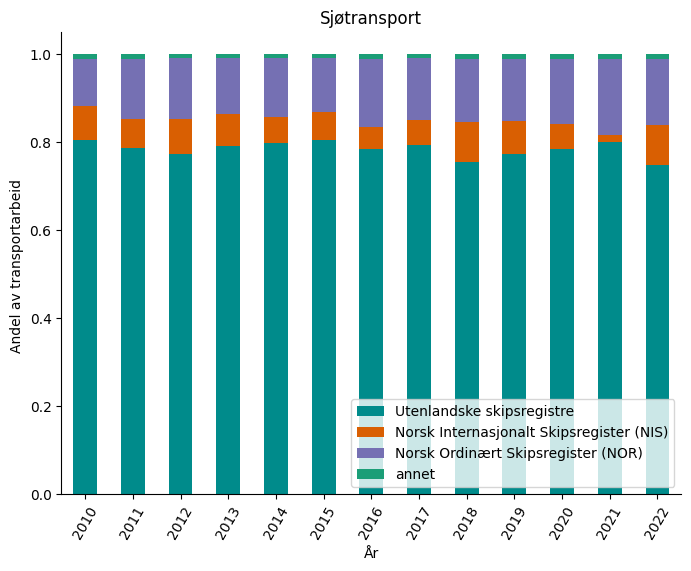

In [44]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colors=['#008b8b','#d95f02', '#7570b3', '#1b9e77', '#e7298a']
df_arb_kab[['Utenlandske skipsregistre_prosent','NIS_prosent' ,'NOR_prosent', 'utenreg_prosent']].plot(ax=ax, kind='bar', stacked=True, rot=60, color=colors )
handles,labels = ax.get_legend_handles_labels()
labels = ['Utenlandske skipsregistre','Norsk Internasjonalt Skipsregister (NIS)','Norsk Ordinært Skipsregister (NOR)',"annet"]
ax.legend(handles,labels, loc='lower right')
ax.set_xlabel("År")
ax.set_ylabel("Andel av transportarbeid ")
ax.set_title("Sjøtransport")
ax.spines[['right', 'top']].set_visible(False)

fig.savefig('img/sjo_registre.jpg')


## Transportarbeid uten kabotasje

In [28]:
df_arb=df[df["statistikkvariabel"]=="Transportarbeid (mill. tonnkm)"]
df_arb=df_arb.pivot(index="år_int", columns='godstransport', values='value')

In [29]:
df_arb

godstransport,Annen sjøtransport,Bilferjeruter,Fastlandstransport i alt,Gasstransport i rør,Godstransport i alt,Jernbanetransport,Lufttransport,Norsk Internasjonalt Skipsregister (NIS),Norsk Ordinært Skipsregister (NOR),Oljetransport i rør,Oljetransport med skip,Sjøtransport,Transport norsk kontinentalsokkel - fastland i alt,Utenlandske skipsregistre,Veitransport
år_int,,,,,,,,,,,,,,,
2010,1729.0,159.0,20651.0,20967.0,46834.0,1571.0,16.0,NaN,1729.0,3465.0,1751.0,1888.0,26183.0,NaN,17176.0
2011,2242.0,163.0,21000.0,19931.0,44914.0,1614.0,16.0,NaN,2242.0,3372.0,611.0,2405.0,23914.0,NaN,16965.0
2012,2586.0,171.0,22307.0,20955.0,46447.0,1718.0,16.0,NaN,2586.0,3115.0,70.0,2757.0,24140.0,NaN,17816.0
2013,2341.0,172.0,23469.0,18186.0,44454.0,1770.0,13.0,NaN,2341.0,2724.0,75.0,2513.0,20985.0,NaN,19173.0
2014,2627.0,178.0,24426.0,21659.0,48951.0,1666.0,16.0,NaN,2627.0,2845.0,21.0,2805.0,24525.0,NaN,19939.0
2015,2717.0,177.0,24061.0,21982.0,49463.0,1841.0,16.0,NaN,2717.0,3377.0,42.0,2894.0,25401.0,NaN,19310.0
2016,2640.0,174.0,24039.0,22025.0,49928.0,1955.0,15.0,NaN,2640.0,3813.0,51.0,2814.0,25889.0,NaN,19255.0
2017,2593.0,178.0,24350.0,22983.0,52148.0,2093.0,16.0,NaN,2593.0,4768.0,47.0,2771.0,27798.0,NaN,19471.0
2018,2478.0,180.0,24058.0,21826.0,50433.0,2031.0,11.0,NaN,2478.0,4518.0,31.0,2658.0,26375.0,NaN,19357.0


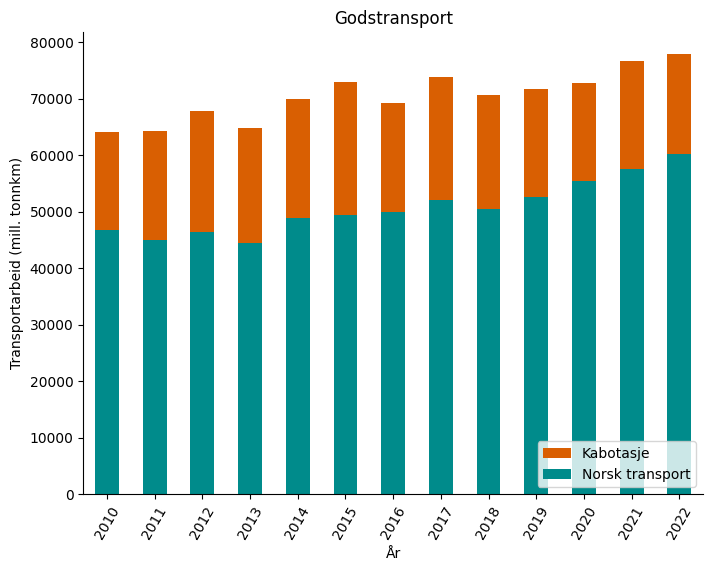

In [43]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colors=['#008b8b','#d95f02', '#7570b3', '#1b9e77', '#e7298a']

df_arb_kab.reset_index().plot(ax=ax, kind='bar', x='år_int', y='Godstransport i alt', color=colors[1])
df_arb[["Godstransport i alt"]].plot(ax=ax, kind='bar', stacked=True, rot=60, color=colors )

handles,labels = ax.get_legend_handles_labels()
labels=['Kabotasje', 'Norsk transport']
ax.legend(handles,labels,loc='lower right')

ax.set_xlabel("År")
ax.set_ylabel("Transportarbeid (mill. tonnkm)")
ax.set_title("Godstransport")
ax.spines[['right', 'top']].set_visible(False)
fig.savefig('img/Andel_kabotasje.jpg')


In [31]:
df_arb['Godstransport i alt']/df_arb_kab['Godstransport i alt']

år_int
2010    0.730446
2011    0.699257
2012    0.684645
2013    0.686569
2014    0.699190
2015    0.678812
2016    0.720784
2017    0.707063
2018    0.713328
2019    0.733292
2020    0.761786
2021    0.750078
2022    0.773243
Name: Godstransport i alt, dtype: float64

In [32]:
(1-df_arb['Transport norsk kontinentalsokkel  -  fastland i alt']/df_arb_kab['Transport norsk kontinentalsokkel  -  fastland i alt'])#.mean()

år_int
2010    0.102277
2011    0.178185
2012    0.175265
2013    0.154649
2014    0.134554
2015    0.131322
2016    0.151876
2017    0.156307
2018    0.162858
2019    0.108996
2020    0.096316
2021    0.121459
2022    0.049938
Name: Transport norsk kontinentalsokkel  -  fastland i alt, dtype: float64

In [33]:

(1-df_arb['Fastlandstransport i alt']/df_arb_kab['Fastlandstransport i alt'])#.mean()

år_int
2010    0.409144
2011    0.402271
2012    0.421664
2013    0.412158
2014    0.413865
2015    0.448471
2016    0.379543
2017    0.403274
2018    0.386182
2019    0.388877
2020    0.364592
2021    0.361780
2022    0.364140
Name: Fastlandstransport i alt, dtype: float64

In [34]:
(1-df_arb['Sjøtransport']/df_arb_kab['Sjøtransport'])#.mean()

år_int
2010    0.882000
2011    0.852218
2012    0.852889
2013    0.863646
2014    0.857361
2015    0.868520
2016    0.835140
2017    0.851198
2018    0.845195
2019    0.847420
2020    0.840400
2021    0.816767
2022    0.838918
Name: Sjøtransport, dtype: float64

In [35]:
(1-df_arb['Lufttransport']/df_arb_kab['Lufttransport'])

år_int
2010    0.0
2011    0.0
2012    0.0
2013    0.0
2014    0.0
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
2020    0.0
2021    0.0
2022    0.0
Name: Lufttransport, dtype: float64

In [36]:
(1-df_arb['Veitransport']/df_arb_kab['Veitransport']).mean()

0.024125113008506546

In [37]:
(1-df_arb['Jernbanetransport']/df_arb_kab['Jernbanetransport']).mean()

0.011718234183693391